In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [10]:

df = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\ex2data1.csv",header=None)

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

m = X.shape[0]  # rows
n = X.shape[1] # columns

X = featureNormalization(X)[0]

X = np.append(np.ones((m,1)),X,axis=1)
y = y[:, np.newaxis]

theta = np.zeros((n+1,1))
alpha =1
J_history =[]
epochs = []


In [14]:
for i in range(150):
    z = np.dot(X,theta)
    predictions = 1 /(1+ np.exp(-z))
    error_class1 = -y * np.log(predictions)
    error_class2 = (1-y) * np.log(1-predictions)
    
    error = error_class1 - error_class2
    
    cost = (1/m) * np.sum(error)
    
    print("Cost:",cost)
    grad = (1/m) * np.dot(X.transpose(),(predictions - y))
    theta = theta - (alpha * grad)
    J_history.append(cost)
    epochs.append(i)

Cost: 0.20640714305352195
Cost: 0.20636168810838995
Cost: 0.20631705062985212
Cost: 0.20627321315052569
Cost: 0.20623015865307168
Cost: 0.20618787055627547
Cost: 0.2061463327016366
Cost: 0.20610552934044493
Cost: 0.2060654451213243
Cost: 0.20602606507822166
Cost: 0.20598737461882566
Cost: 0.20594935951339532
Cost: 0.20591200588398317
Cost: 0.205875300194035
Cost: 0.20583922923835335
Cost: 0.20580378013340767
Cost: 0.20576894030797913
Cost: 0.20573469749412535
Cost: 0.20570103971845322
Cost: 0.20566795529368748
Cost: 0.20563543281052313
Cost: 0.20560346112975122
Cost: 0.2055720293746465
Cost: 0.20554112692360815
Cost: 0.20551074340304257
Cost: 0.20548086868047968
Cost: 0.2054514928579139
Cost: 0.20542260626536085
Cost: 0.20539419945462312
Cost: 0.20536626319325435
Cost: 0.20533878845871806
Cost: 0.2053117664327309
Cost: 0.20528518849578514
Cost: 0.20525904622184332
Cost: 0.20523333137319955
Cost: 0.20520803589550007
Cost: 0.20518315191291833
Cost: 0.20515867172347943
Cost: 0.20513458779

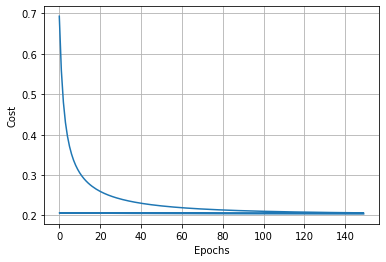

In [15]:
plt.plot(epochs,J_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid()

In [16]:
# The drop is sharper and cost function plateau around the 150 iterations.
# Get the optimized theta at iteration of 150
theta

array([[1.60914669],
       [3.76003484],
       [3.49995159]])

In [17]:
y_predicted = np.dot(X,np.array([[1.41957362],[3.35941597],[3.11271333]]))

In [18]:
y_pre = []

for i in range(len(y_predicted)):
    if y_predicted[i] < 0.5:
        y_pre.append(0)
    else:
        y_pre.append(1)

In [19]:
df["Predicted"] = y_pre

In [20]:
df

,0,1,2,Predicted
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1
...,...,...,...,...
95,83.489163,48.380286,1,1
96,42.261701,87.103851,1,1
97,99.315009,68.775409,1,1
98,55.340018,64.931938,1,0
